In [1]:
import os, sys
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
sys.path.append('../readmaroc')
import seaborn as sns
from maroc_data_new_tboard import MarocData
from functools import partial
from scipy.stats import norm
from operator import add
from functools import reduce 
import operator
import json
input_dat = '../data/Run000137492.dat'
marocdata = MarocData(input_dat)

In [2]:
y_offset = [12000, 10000, 8000, 4000, 2000]

In [4]:
def take_consecutive(index_list):
    if len(index_list)<3:
        return None
    else:
        consecutive = []
        index_list = np.sort(index_list)
        for el, elp1 in zip(index_list, index_list[1:]):
            if elp1==el+1:
                consecutive.append(el)
                consecutive.append(elp1)
        if len(consecutive)==0:
            return None
        else:
            return np.unique(consecutive)

In [5]:
def over_threshold_per_board(marocdata, pedestals, noise):
    ts_over_threshold_per_board = {}
    for bid in marocdata.active_boards:
        timestamps = []
        board = marocdata.get_board(bid)
        for eid, signal in board.signals.items():
            if np.any((signal - pedestals[bid]) > noise[bid]):
                over = np.sort(np.where((signal - pedestals[bid]) > noise[bid])[0])
                consecutives = take_consecutive(over)
                if consecutives is None:
                    pass
                else:
                    if len(consecutives) <= 40:
                        event = board.get_event(eid)
                        print(bid, eid, event.TS_norm)
                        timestamps.append(event.TS_norm)
                    
        ts_over_threshold_per_board[bid] = timestamps
    return ts_over_threshold_per_board

In [6]:
marocdata.fix_p1(debug=False)

In [7]:
y_offset = [12000, 10000, 8000, 4000, 2000]
marocs = [(i, j) for i, j in zip(np.arange(0, 384, 64), np.arange(0, 384, 64)[1:])]

In [33]:

def board_plot(ax, ts, marocdata, board_id, board_idx, triplet_idx, c="blue"):
    if board_id in marocdata.active_boards:
        board = marocdata.get_board(board_id)
        if ts in board.clean_timestamps.keys():
            evt = board.clean_timestamps[ts]
            if evt in board:
                signal = board.signals[evt]
                if np.max(signal) > 2000:
                    signal = signal * 0.45
                pedestal = pedestals_tot[board_id]
                noise = noise_tot[board_id] 
                if np.any(signal - pedestal > noise):
                    over = np.where(signal - pedestal > noise)[0]
                    seed = np.max((signal - pedestal)[over])
                    over_x = np.where(signal - pedestal == seed)[0][0]
                    ax.scatter(
                                         over_x+ (board_idx * 320),
                                         seed + y_offset[triplet_idx],
                                         color='k', marker='s',
                                         s=400,facecolors='none', alpha=.7
                                     )
                ax.plot(
                    np.arange(0 + (board_idx * 320), 320 + 320 * board_idx),
                    (signal - pedestal) + y_offset[triplet_idx],
                    color=c,
                    linewidth=1,
                )
                #                 ax.plot(
                #                     np.arange(0 + (board_idx * 320), 320 + 320 * board_idx),
                #                     (noise) + y_offset[triplet_idx],
                #                     color='green',
                #                     linewidth=1,
                #                 )
                ax.text(
                    (320 + 320 * board_idx - 0 + (board_idx * 320)) / 2 - 150,
                    y_offset[triplet_idx] - 300,
                    "board: {}".format(board_id),
                    size="small",
                )
                ax.axvline(
                    320 * (board_idx + 1),
                    linestyle="--",
                    linewidth=0.75,
                    color="grey",
                    alpha=0.5,
                )
    return ax


def plot_event_ts_new(ts, marocdata):
    print(ts)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10), sharey=True, sharex=True)
    evt = None
    for i, (triplet_y, triplet_x) in enumerate(
        zip(np.arange(1, 16).reshape(5, 3), np.arange(16, 31).reshape(5, 3))
    ):
        for j, (board_y, board_x) in enumerate(zip(triplet_y, triplet_x)):
            if board_y in marocdata.active_boards:
                yboard = marocdata.get_board(board_y)
                ax1 = board_plot(ax1, ts, marocdata, board_y, j, i)
            if board_x in marocdata.active_boards:
                xboard = marocdata.get_board(board_x)
                ax2 = board_plot(ax2, ts, marocdata, board_x, j, i, c="red")
    #    if (evt is None):
    #        return None # skip
    ax1.set_title("y layers", size="x-large")
    ax2.set_title("x layers", size="x-large")
    plt.yticks(
        y_offset,
        ["layer 0", "layer 1", "layer 2", "layer 3", "layer 4"],
        size="x-large",
    )
    plt.xticks([0, 320, 640, 960])
    fig.text(0.5, 0.05, "strips", size="large")
    fig.text(0.5, 0.95, "TS {}".format(ts), size="large")
    plt.ylim(1000, 13000)
    plt.xlim(-10, 970)
    return fig, ax1, ax2




In [34]:
pedestals_tot = marocdata.pedestals_tot
noise_tot = marocdata.noise_tot(4)

In [35]:
2783132320

2783132320

In [36]:
ts_over_threshold = over_threshold_per_board(marocdata, pedestals_tot, noise_tot)

all_ts = reduce(add, ts_over_threshold.values())

1 723 2788923713
2 178 1498477343
2 365 3242694274
4 48 218433683
4 268 2468318419
4 804 3504449564
4 839 3881185367
4 1017 1466953012
4 1096 2401621640
4 1134 2763548747
5 179 1532182264
5 307 2823885232
5 519 713064588
5 775 3216309750
5 810 3616791488
5 832 3825886386
5 1031 1672787840
5 1064 2078123995
5 1109 2502684387
6 121 983535827
6 210 1855514825
6 786 3333469852
6 919 519904783
6 929 613207182
7 68 423152684
7 84 584848772
7 170 1458444293
7 368 3280827483
7 534 925436719
7 614 1773566610
7 755 3015614535
7 825 3785369756
7 1004 1292527551
7 1051 1979575942
7 1095 2401621640
8 380 3480995392
8 596 1555534304
8 690 2445945054
8 694 2467530233
8 924 569846197
8 1059 2025422909
8 1079 2258705994
8 1090 2359991769
9 170 1458444293
9 349 3179245078
10 90 612554681
10 233 2064448517
10 528 880107239
10 1193 3400193766
11 137 1148561243
11 346 3153817401
11 548 1059029277
12 27 94371096
12 146 1202015413
12 329 2985420412
12 453 4625629
12 467 108993145
12 675 2300625016
12 680 233

In [37]:
ts_to_plot = [ts for ts, occ in Counter(all_ts).items() if occ >= 3]

2468318419


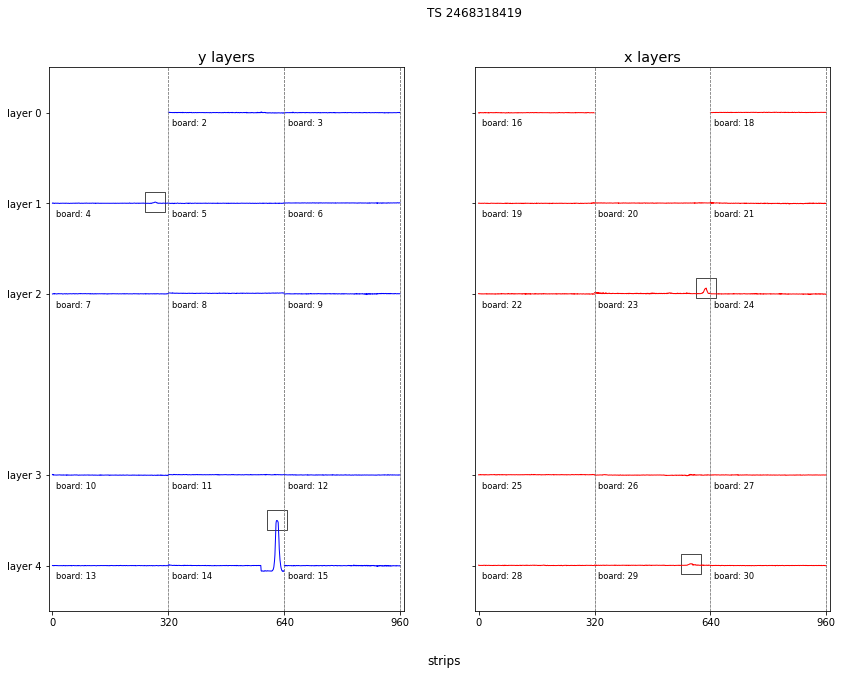

1202015413


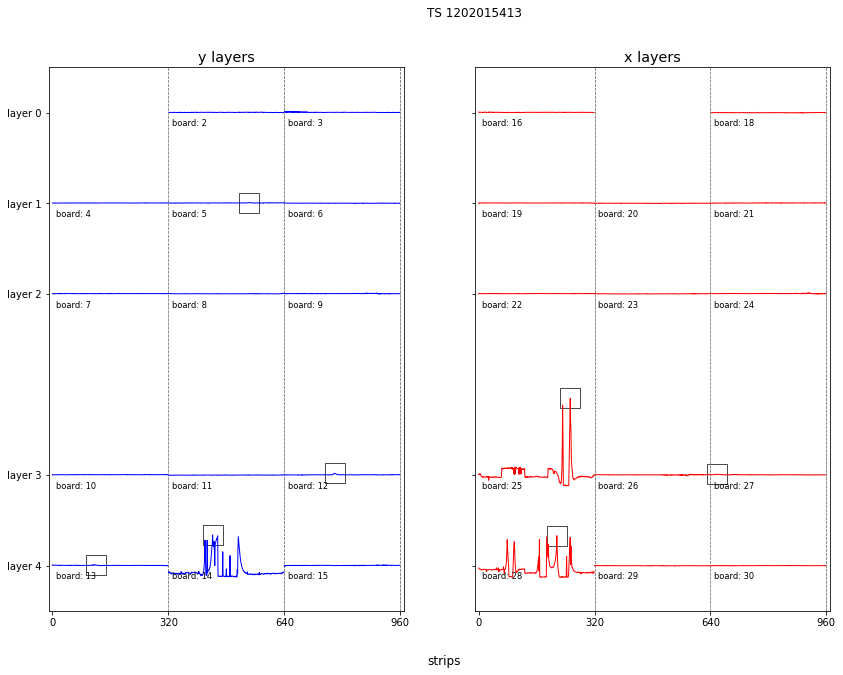

3280572517


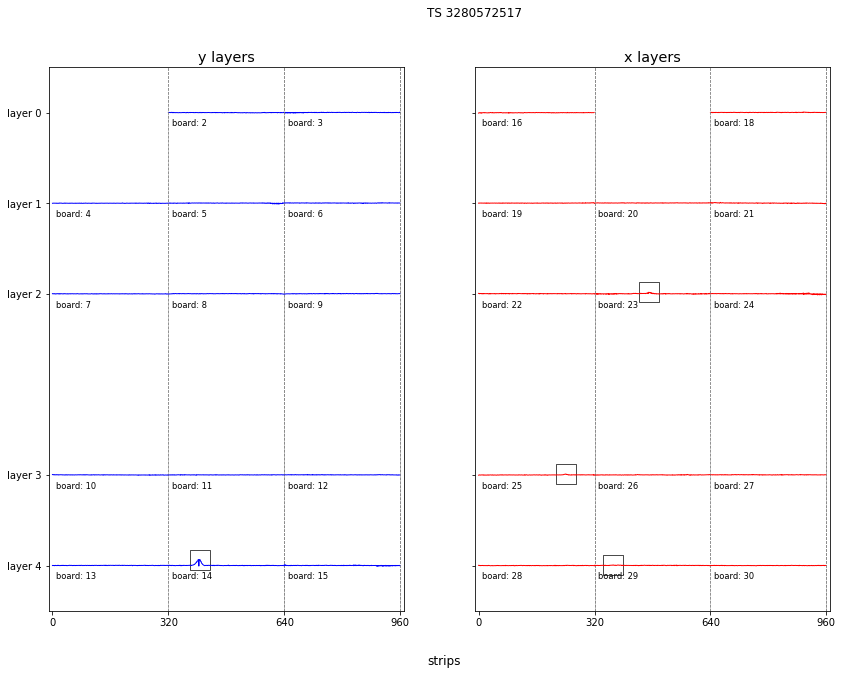

4132466827


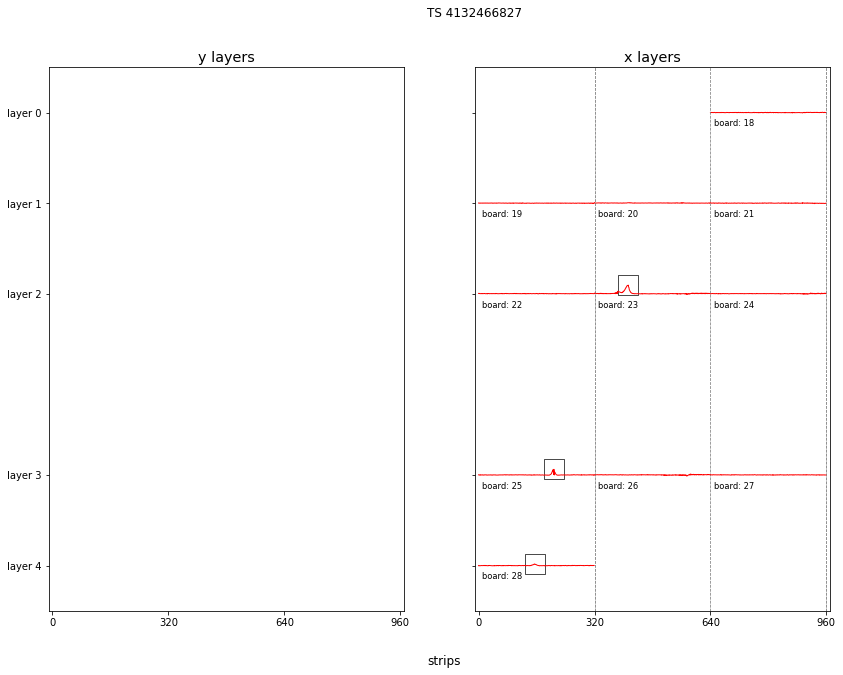

2783132320


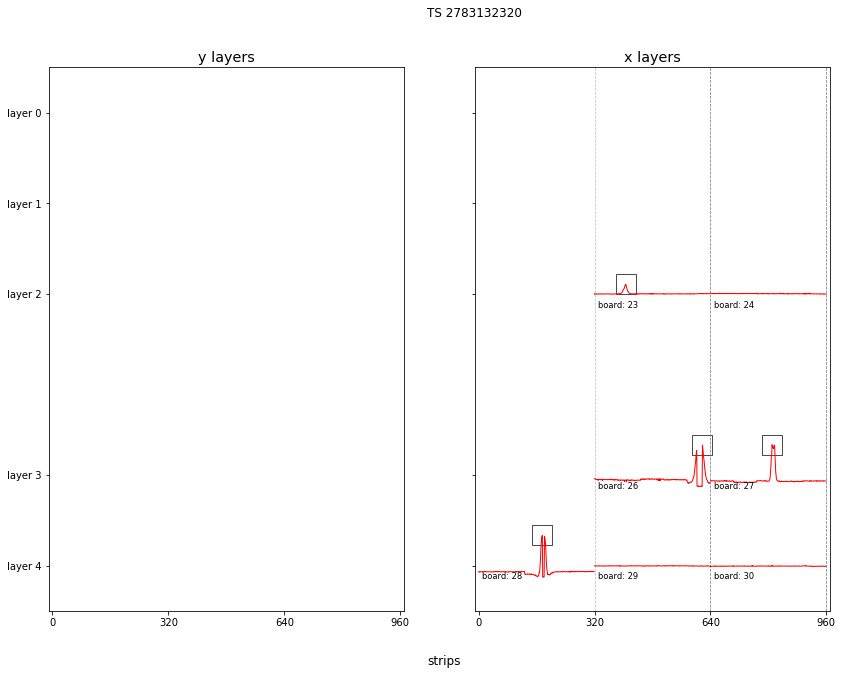

In [38]:
for ts in ts_to_plot:
    fig, ax1, ax2 = plot_event_ts_new(ts, marocdata)
    plt.show()

03421

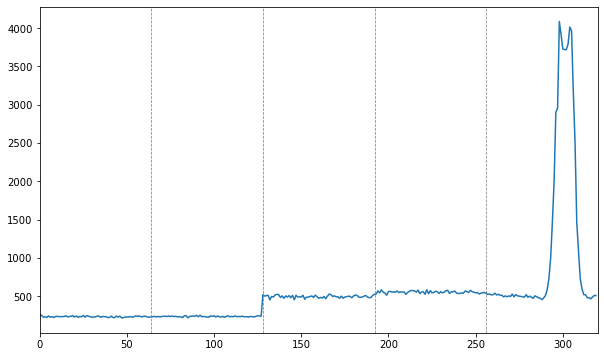

In [12]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(320), marocdata.get_board(27).get_event(1135).signal)
for maroc in marocs:
    plt.axvline(maroc[1], linewidth=.75, linestyle='--', c='grey')
plt.xlim(0,320)
plt.show()

In [46]:
def reorder_marocs(signal, reorder_map = [0,3,1,-2,-2]):
    reordered_array = np.zeros(signal.shape[0])
    for m, (a, b) in enumerate(marocs):
        reordered_array[a+reorder_map[m]*64: b+reorder_map[m]*64] = signal[a:b]
    return reordered_array


In [44]:
reordered_signal = reorder_marocs(marocdata.get_board(27).get_event(1135).signal)

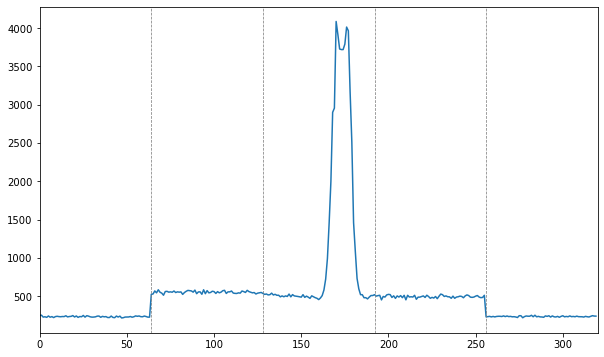

In [45]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(320), reordered_signal)
for maroc in marocs:
    plt.axvline(maroc[1], linewidth=.75, linestyle='--', c='grey')
plt.xlim(0,320)
plt.show()